In [144]:
import pandas as pd

from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import plotly as py
import matplotlib.pyplot as plt


from tqdm import tqdm, trange
import seaborn as sns
import random
from sklearn import preprocessing


from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from pprint import pprint
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold



KNN preparation/implementation

In [193]:
#scaling features that need it 
#https://datascience.stackexchange.com/questions/38395/standardscaler-before-or-after-splitting-data-which-is-better
sc = StandardScaler()
X_train = sc.fit_transform(df_train2_x)
X_test = sc.transform (df_val_x)

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [278]:
X_train

array([[        nan, -1.00102146, -0.77959415, ..., -0.0998444 ,
                nan, -0.89671621],
       [        nan, -0.57056291, -0.76890914, ..., -0.0998444 ,
                nan,  1.02437907],
       [        nan, -0.14202706, -1.16425432, ..., -0.0998444 ,
                nan,  1.02437907],
       ...,
       [-0.24394358,  0.19583088,  0.83384157, ...,  0.76118164,
        -0.35809971,  1.02437907],
       [-0.37143885, -0.73165499,  0.83384157, ...,  0.76118164,
        -0.39372681,  1.02437907],
       [ 0.20634868,  0.80356423,  0.83384157, ...,  0.76118164,
        -0.19290283,  0.06383143]])

In [23]:
df_train2_y=df_train2['anomaly']

In [24]:
df_val_y=df_val['anomaly']

In [290]:
#why could I feed in an array here? 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, df_train2_y)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(df_val_y, y_pred))

0.9770113627588652


In [374]:
print(metrics.confusion_matrix(df_val_y, y_pred))

[[337981   1557]
 [  6481   3632]]


In [375]:
print(metrics.classification_report(df_val_y,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    339538
           1       0.70      0.36      0.47     10113

    accuracy                           0.98    349651
   macro avg       0.84      0.68      0.73    349651
weighted avg       0.97      0.98      0.97    349651



In [103]:
df_train_full['meter_reading'].isnull().sum()



107653

In [447]:
cm = metrics.confusion_matrix(df_val_y, y_pred)
print(cm)

[[337981   1557]
 [  6481   3632]]


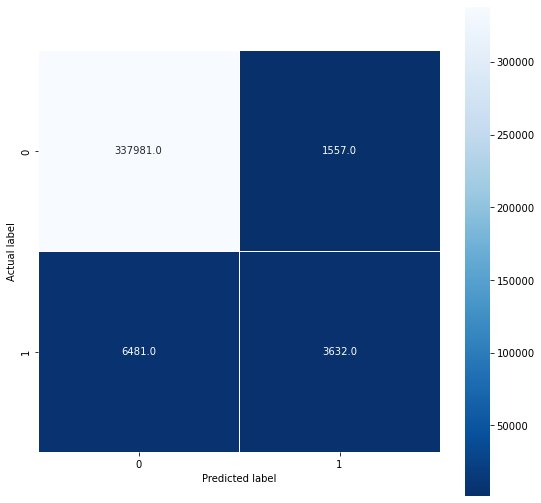

In [448]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [47]:
#from: https://www.kaggle.com/code/patrick0302/2-anomaly-detection-features-csv-revised-ensem
df_train2[df_train2['anomaly']==1].isnull().sum() #all anomalies don't have null values

building_id                      0
timestamp                        0
meter_reading                    0
anomaly                          0
site_id                          0
primary_use                      0
square_feet                      0
year_built                       0
floor_count                      0
air_temperature                  0
cloud_coverage                   0
dew_temperature                  0
precip_depth_1_hr                0
sea_level_pressure               0
wind_direction                   0
wind_speed                       0
air_temperature_mean_lag7        0
air_temperature_max_lag7         0
air_temperature_min_lag7         0
air_temperature_std_lag7         0
air_temperature_mean_lag73       0
air_temperature_max_lag73        0
air_temperature_min_lag73        0
air_temperature_std_lag73        0
hour                             0
weekday                          0
month                            0
year                             0
weekday_hour        